# K-Means Overview

K-means is one of the most basic clustering algorithms. It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.

In [1]:
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

In [2]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

# Cluster Starting Points



In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

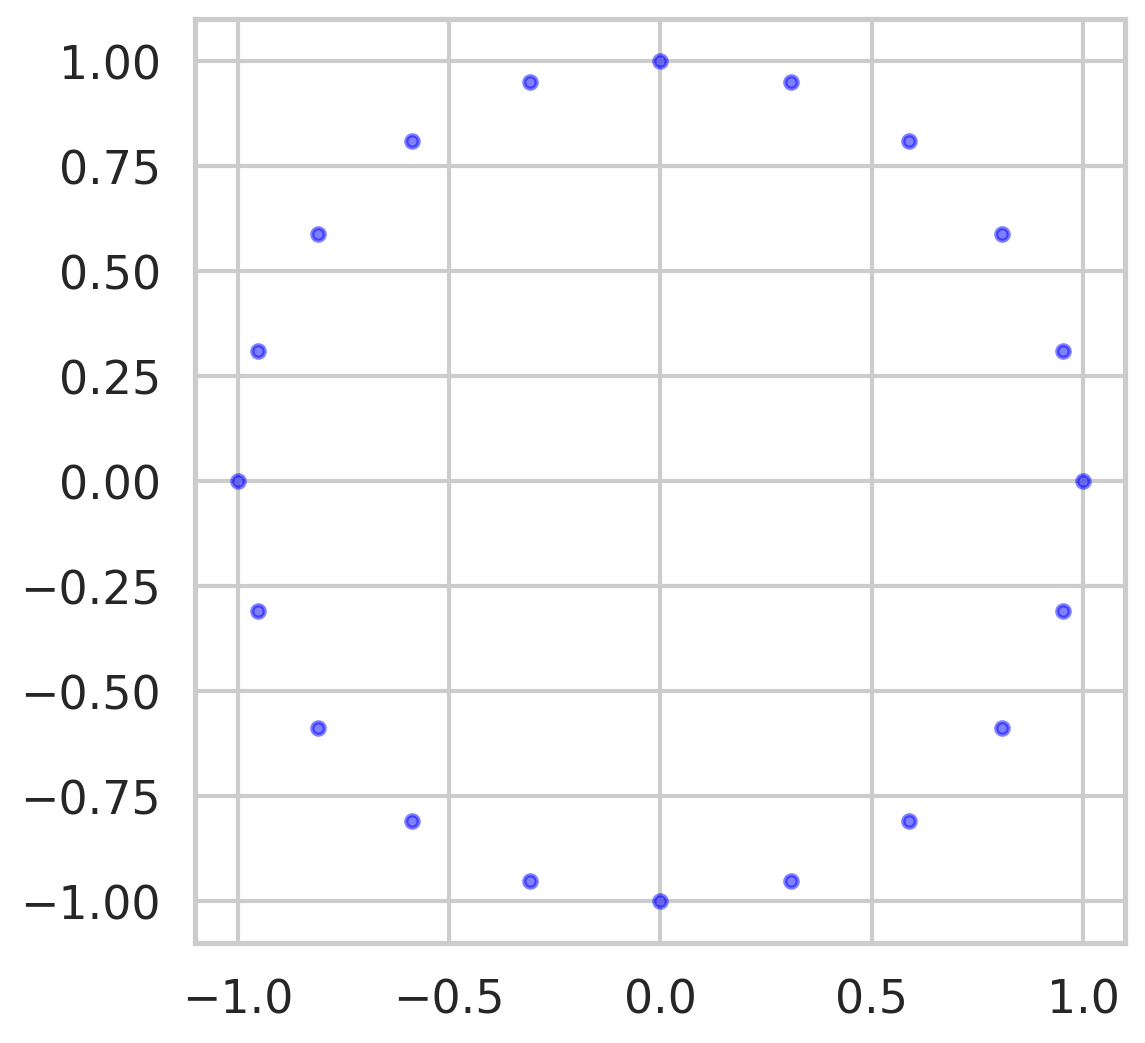

In [4]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

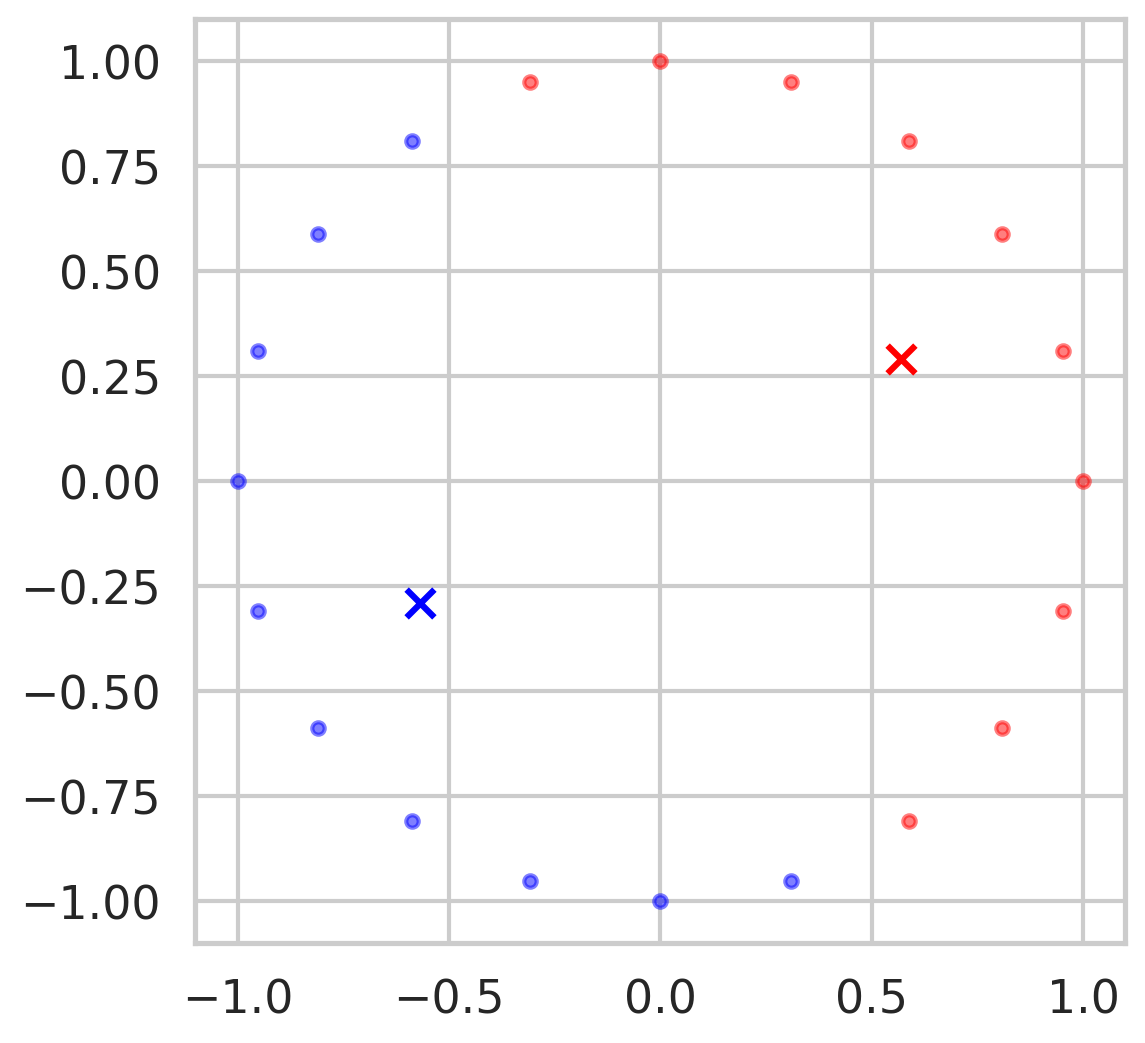

In [7]:
#Clustering with a random state of 10:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

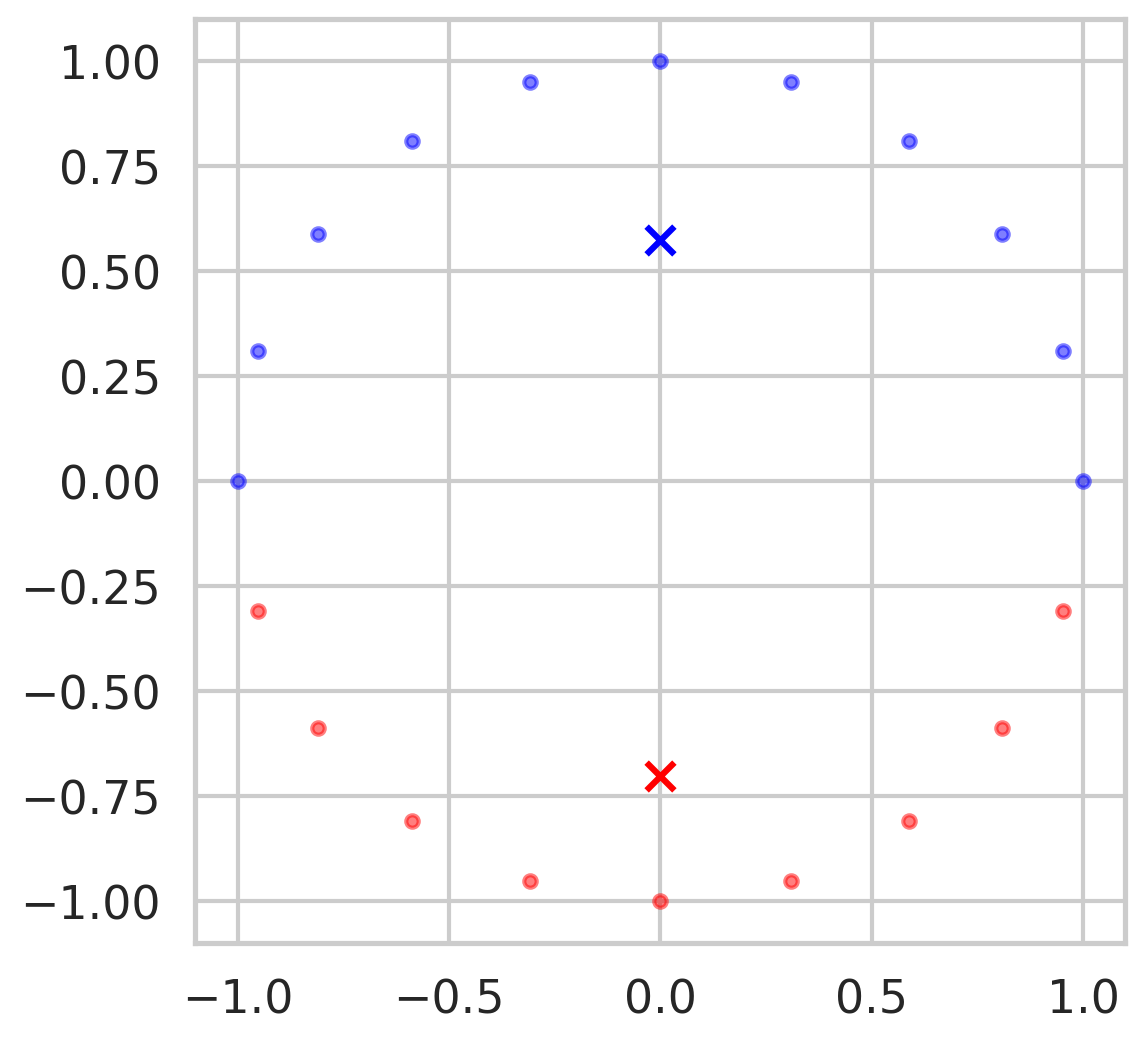

In [8]:
#Clustering with a random state of 20:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

# Question:

Why are the clusters different when we run the K-means twice?

It's because the starting points of the cluster centers have an impact on where the final clusters lie. The starting point of the clusters is controlled by the random state.

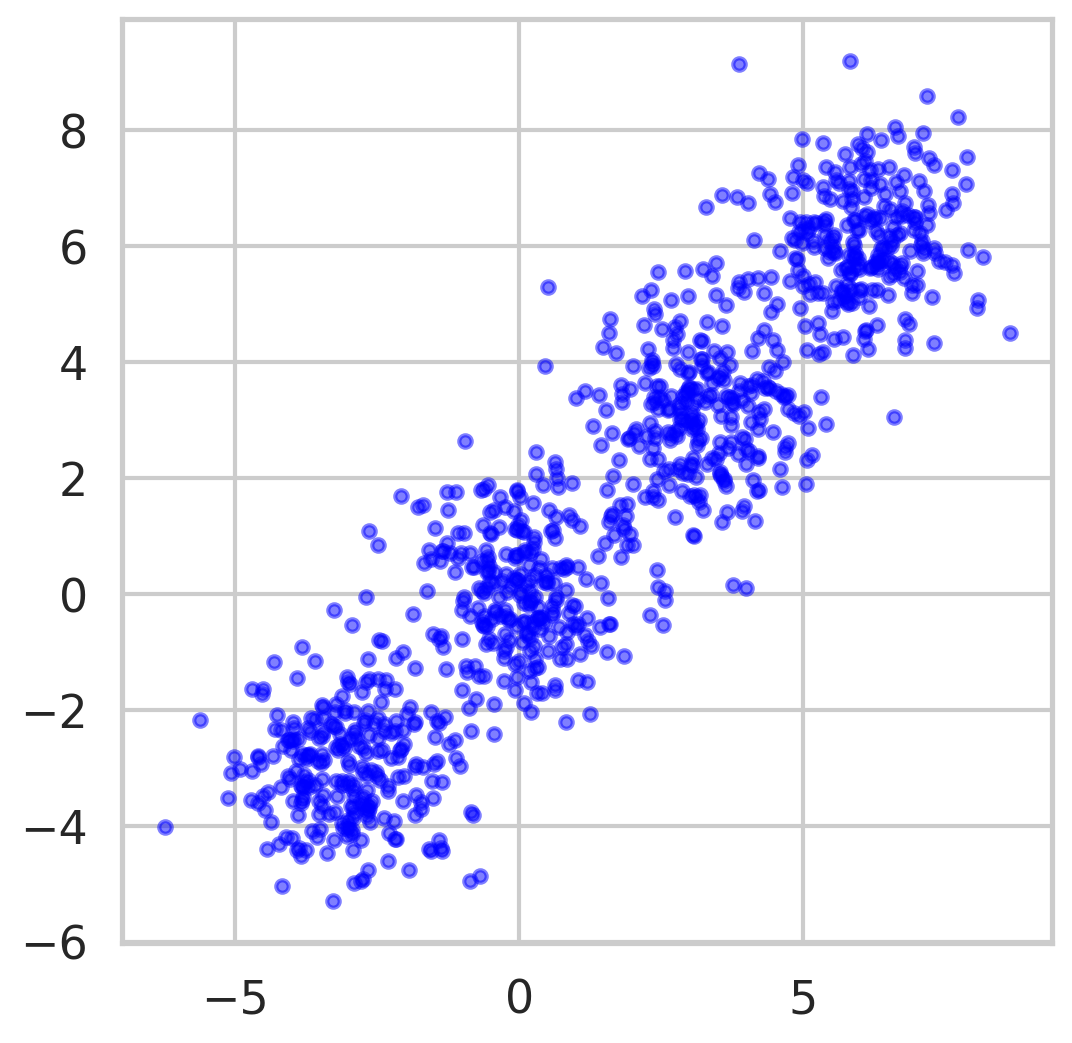

In [9]:
#Determining optimium number of clusters
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

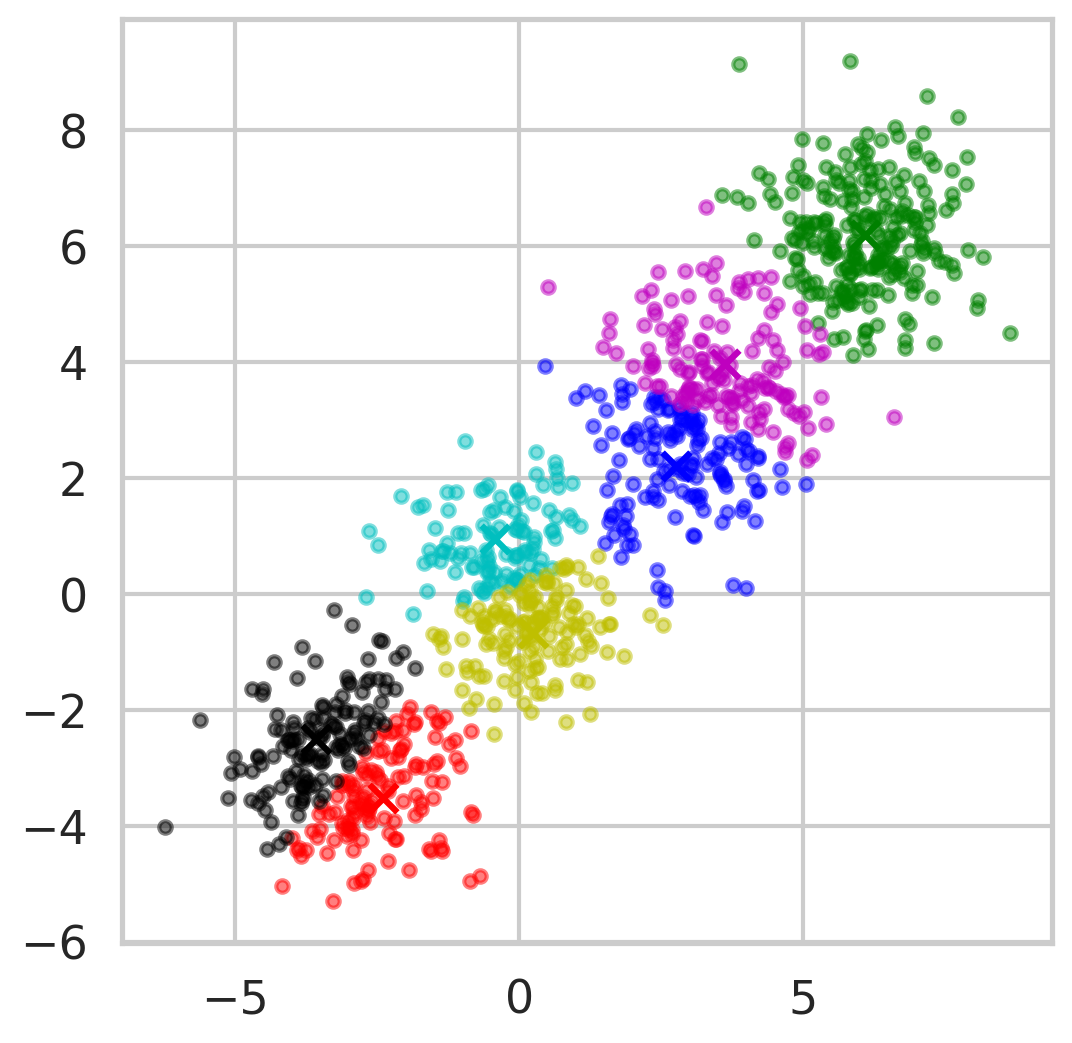

In [10]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

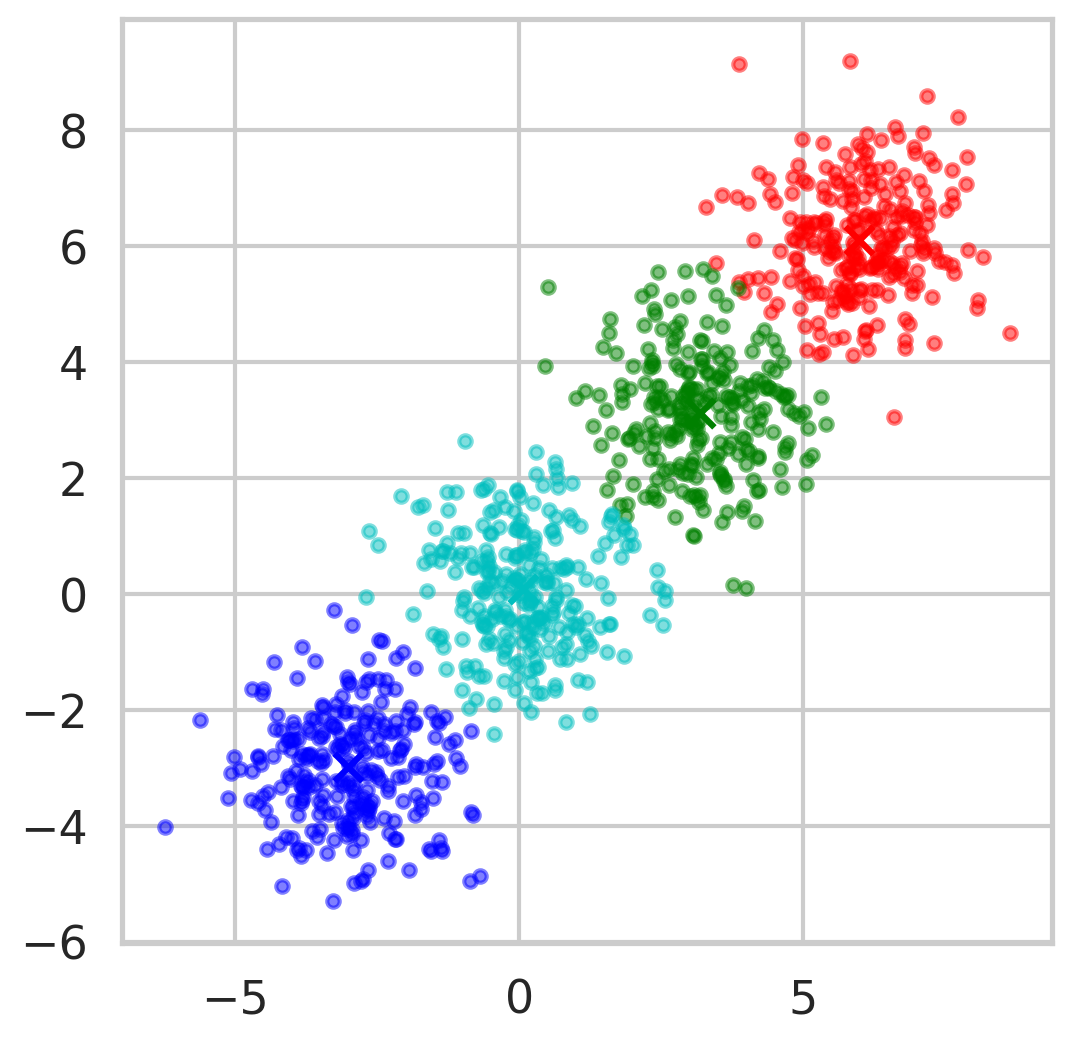

In [11]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Should we use four or seven clusters?

In this case it may be visually obvious that four clusters is better than seven.

This is because we can easily view the data in two dimensional space.

However, real world data usually has more than two dimensions.

A dataset with a higher dimensional space is hard to visualize.

A way of solving this is to plot the inertia

inertia: (sum of squared error between each point and its cluster center) as a function of the number of clusters.

In [12]:
km.inertia_

1880.174402277564

# Problem 1:

Write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.

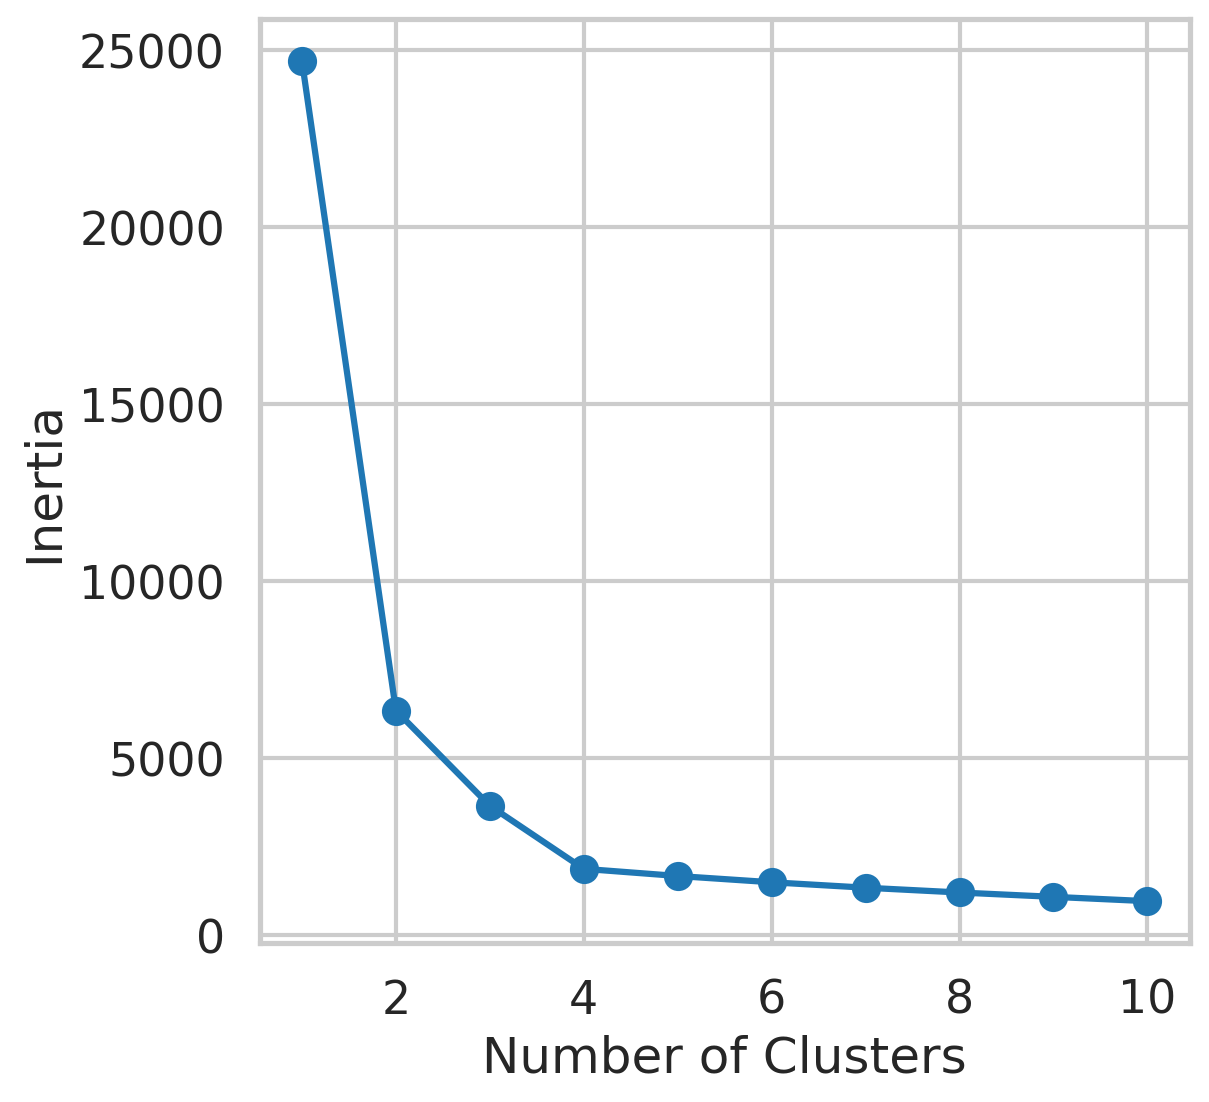

In [13]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

# Clustering Colors from an Image


Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


(-0.5, 639.5, 479.5, -0.5)

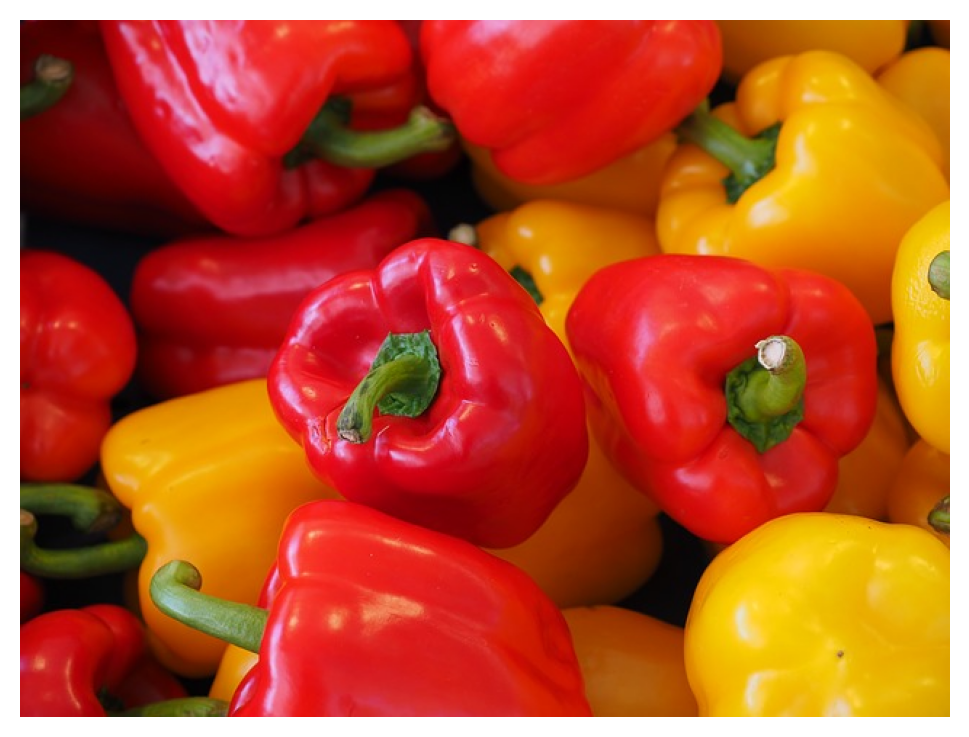

In [16]:
from google.colab import drive
drive.mount('/content/Mydrive')
img = plt.imread('/content/Mydrive/MyDrive/DataSets/peppers.jpg', format='jpeg')
plt.imshow(img)
plt.axis('off')

In [17]:
img.shape

(480, 640, 3)

(-0.5, 0.5, 0.5, -0.5)

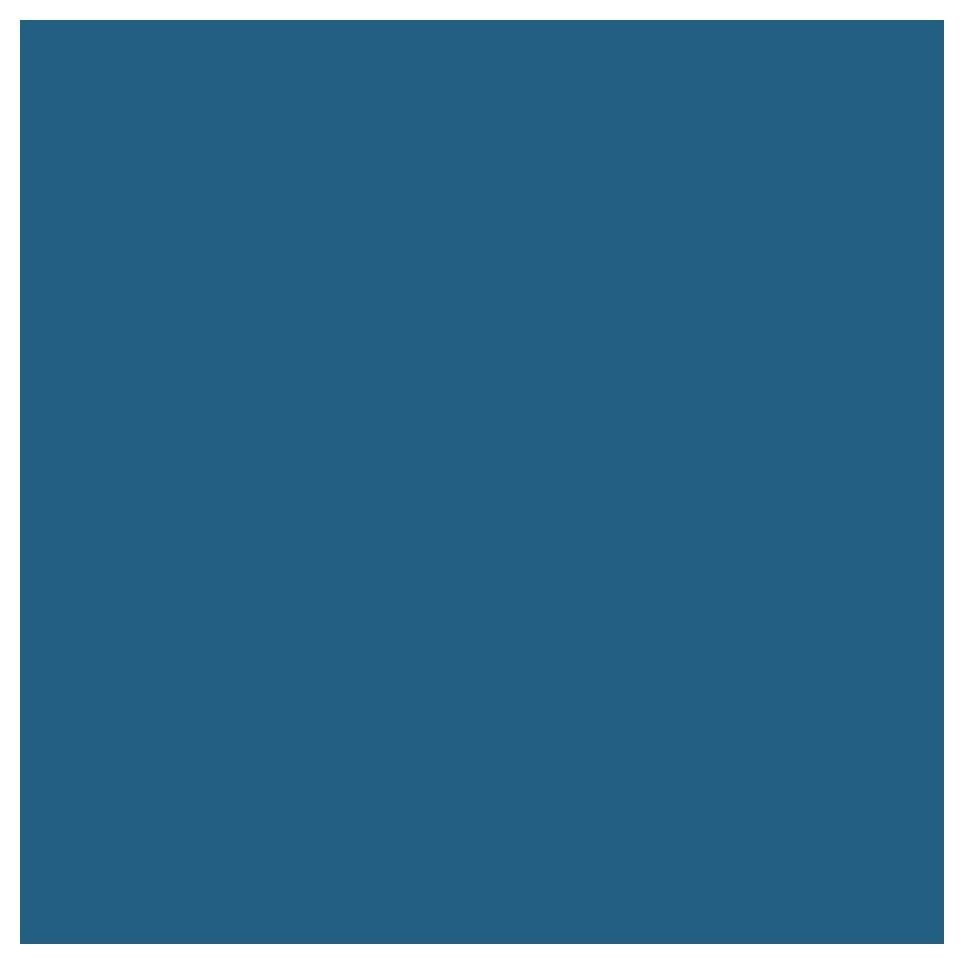

In [18]:
# assign values for the RGB.  Each value should be between 0 and 255
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

In [19]:
img_flat = img.reshape(-1, 3)
img_flat[:5,:]

array([[21, 16, 23],
       [28, 15, 22],
       [45, 14, 22],
       [65, 16, 22],
       [84, 14, 24]], dtype=uint8)

In [20]:
img_flat.shape

(307200, 3)

In [21]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

In [22]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

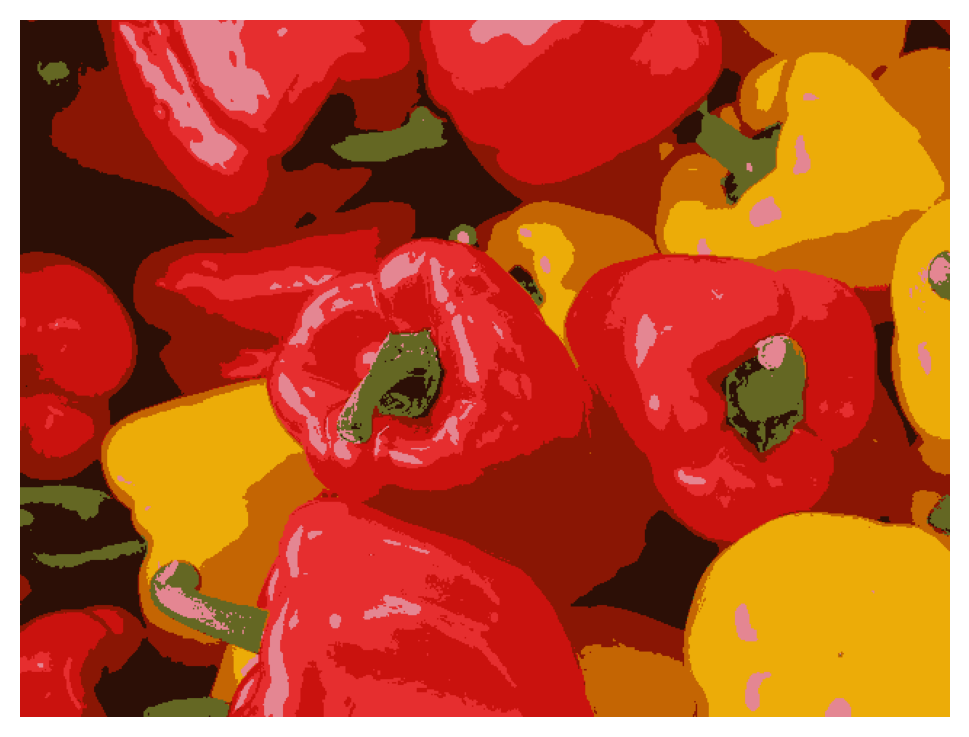

In [23]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

# Problem 2:

Write a function that receives the image and number of clusters (k), and returns (1) the image quantized into k colors, and (2) the inertia.

In [24]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

# Problem 3:

Call the function for k between 2 and 20, and draw an inertia curve. What is the optimum number of clusters?

In [25]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)

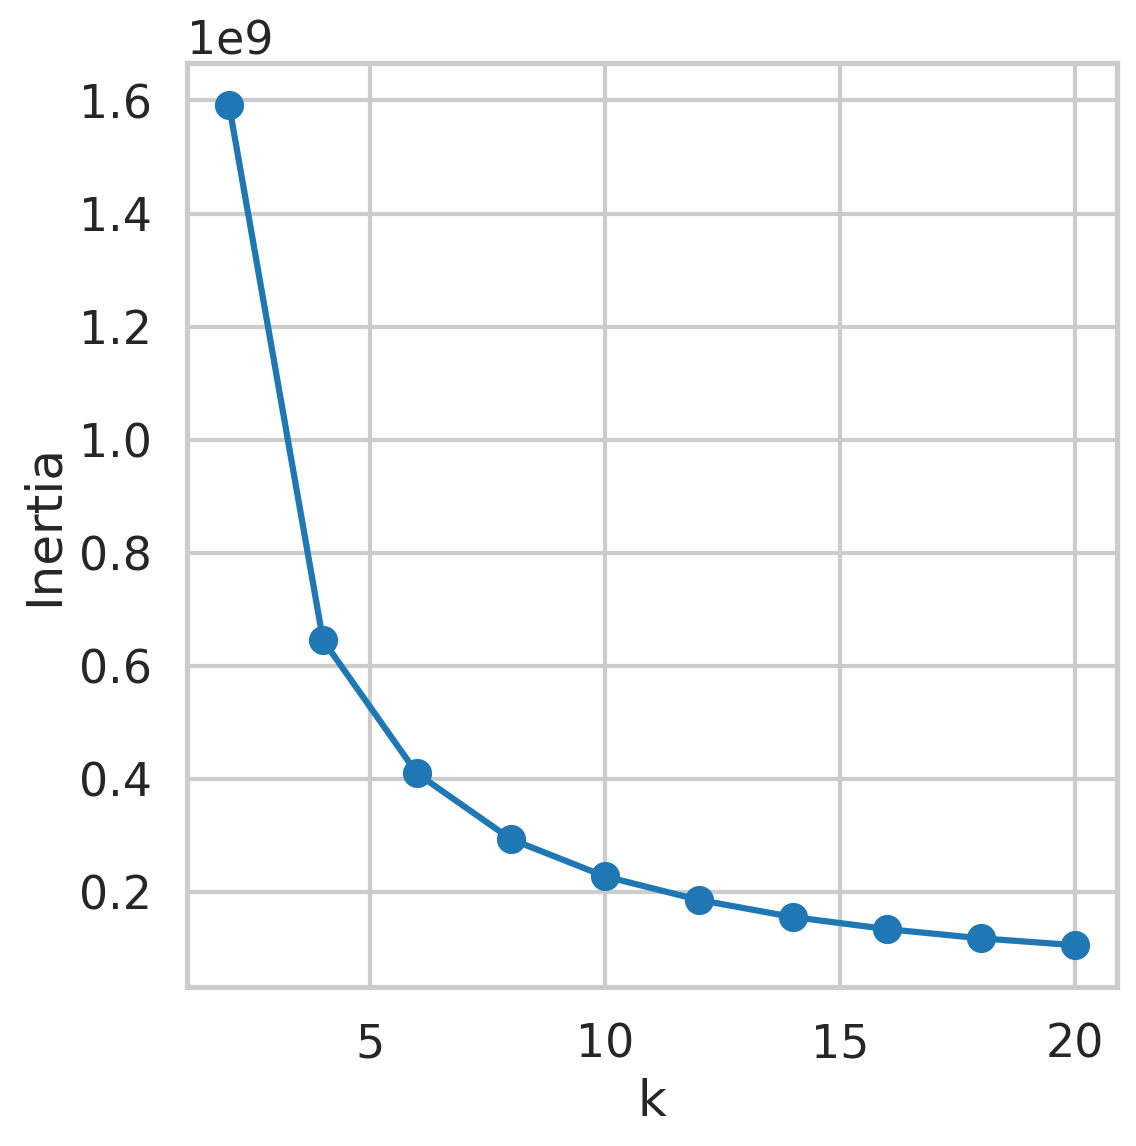

In [26]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

# Problem 4:

Plot in a grid all the images for the different k values.

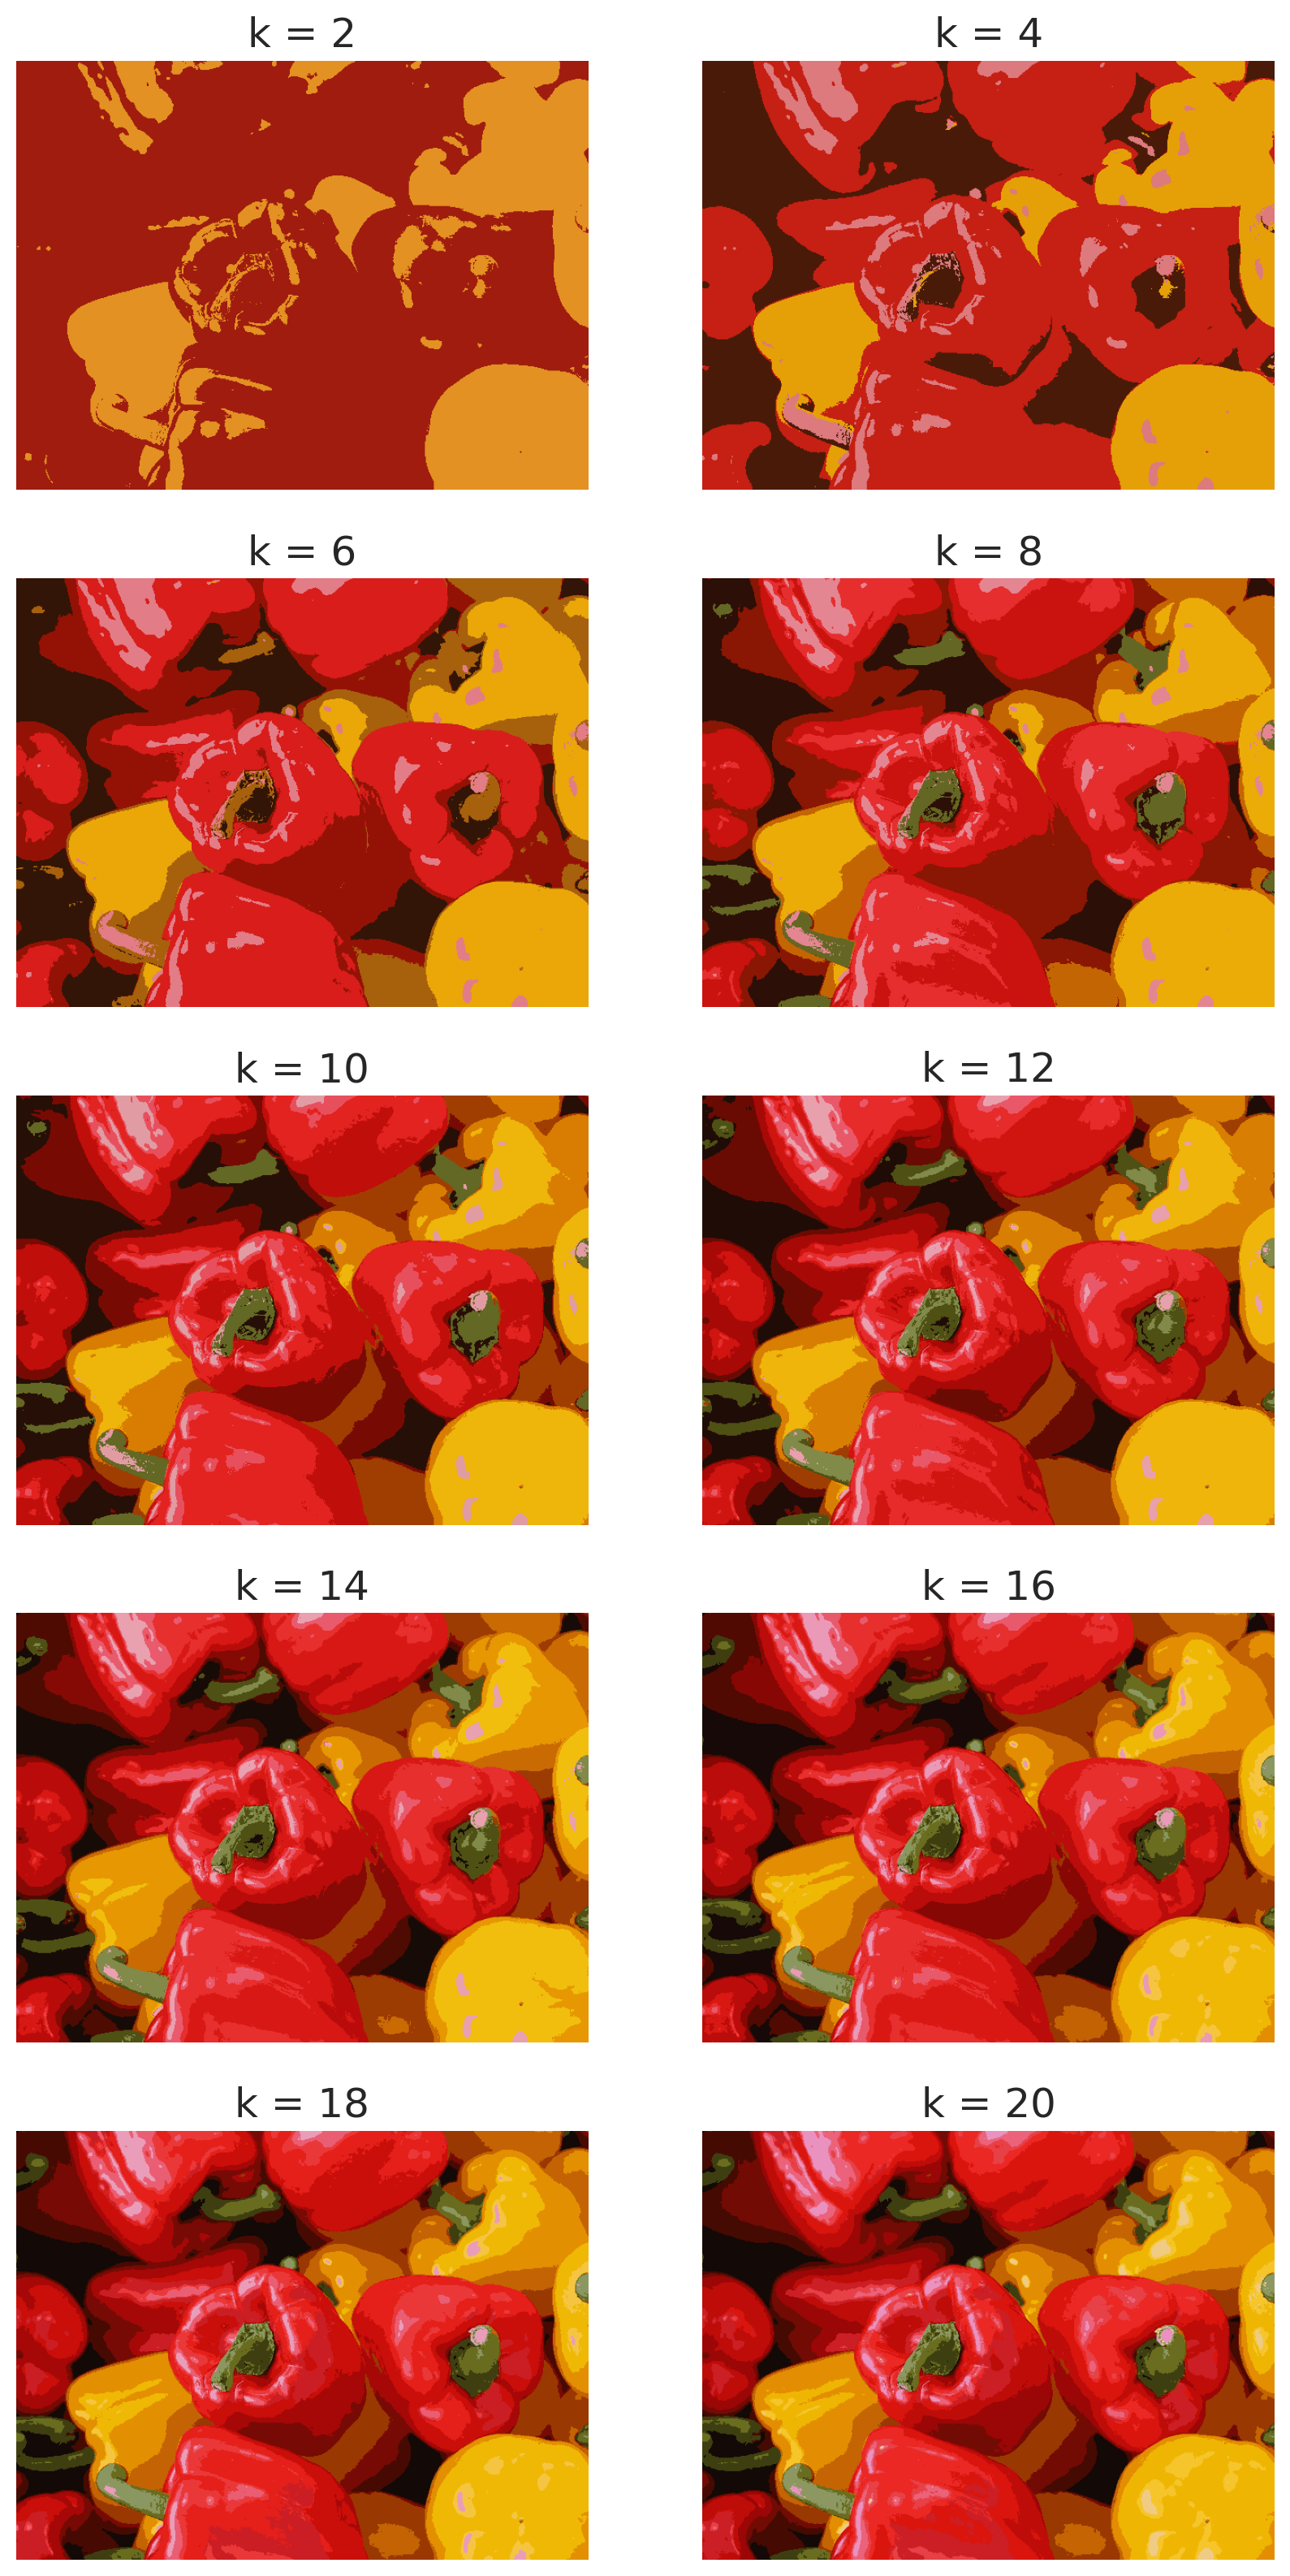

In [27]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');